**Modules**

In [ ]:
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt

**Writing data to CSV files**

In [ ]:
def save_csv(file_name, data, headers):
  #check is the file already exists
    file_exists = os.path.isfile(file_name)

  #open csv file in append mode
    with open(file_name, 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headers)
        #if new file is created write headers
        if not file_exists:
            writer.writeheader()
        #write data
        writer.writerow(data)

**Reading data from CSV files**

In [ ]:
def load_csv(file_name):
  #check if the file exists
    if not os.path.isfile(file_name):
        return []
    with open(file_name, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        #return as a list
        return list(reader)

**User input for new activity and storing**

In [ ]:
def log_activity():
    # Get the current date in the format 'YYYY-MM-DD'
    date = datetime.now().strftime('%Y-%m-%d')

    # Prompt the user to input the activity name
    activity = input("Enter Activity Name: ")

    # Prompt the user to input the duration of the activity in minutes
    duration = int(input("Enter Activity Duration in Minutes: "))

    # Prompt the user to input the number of calories burned
    calories = int(input("Enter Calories Burned: "))

    # Call the `save_csv` function to save the activity log to a CSV file
    save_csv(
        'fitness_tracker.csv',  # File name where the data will be saved
        {  # Dictionary containing the activity data
            'Date': date,
            'Activity': activity,
            'Duration': duration,
            'Calories': calories
        },
        ['Date', 'Activity', 'Duration', 'Calories']  # List of column headers for the CSV file
    )

**View existing activities from CSV file**

In [ ]:
def view_activity():
    # Load the activity data from the CSV file using the `load_csv` function
    activities = load_csv('fitness_tracker.csv')

    # Check if the `activities` list is empty
    if not activities:
        # If no activities are found, print a message and exit the function
        print("No past activity found.\n")
        return

    # Print a header for the list of past activities
    print("Past Activities: ")

    # Loop through each activity in the `activities` list
    for activity in activities:
        # Print the details of each activity in a formatted string
        print(f"{activity['Date']}: {activity['Activity']} - {activity['Duration']} mins, {activity['Calories']} cal")

    # Print an empty line for better readability
    print()

**User input to new goal and write to CSV file**

In [ ]:
def set_goals():
    # Prompt the user to input their weekly exercise goal in minutes
    weekly_minutes = int(input("Set weekly exercise goal (in minutes): "))

    # Prompt the user to input their daily calorie burn goal
    daily_calories = int(input("Set daily calorie burn goal: "))

    # Save the goals to a CSV file using the `save_csv` function
    save_csv(
        'goals.csv',  # File name where the goals will be saved
        {  # Dictionary containing the goals
            'Weekly Minutes': weekly_minutes,
            'Daily Calories': daily_calories
        },
        ['Weekly Minutes', 'Daily Calories']  # List of column headers for the CSV file
    )

    # Print a success message to confirm that the goals have been set
    print("Goals set successfully!\n")

**Progress analysis for existing goals**

In [ ]:
def view_progress():
    # Load data from the  CSV file
    activities = load_csv('fitness_tracker.csv')

    goals = load_csv('goals.csv')

    # Check if there are no activities or goals to analyze
    if not activities:
        print("No activities to analyze progress.\n")
        return

    if not goals:
        print("No goals set to compare progress.\n")
        return

    # Get the most recent set of goals (last row in the goals CSV)
    goals = goals[-1]

    # Extract the weekly exercise and calory goal in minutes
    weekly_goal = int(goals['Weekly Minutes'])

    daily_cal_goal = int(goals['Daily Calories'])

    # Calculate weekly activity duration
    weekly_data = {}
    for activity in activities:
        # Extract the week number from the activity date
        week = datetime.strptime(activity['Date'], '%Y-%m-%d').isocalendar()[1]

        # Add the activity duration to the corresponding week in the dictionary
        weekly_data[week] = weekly_data.get(week, 0) + int(activity['Duration'])

    # Print weekly progress
    print("Weekly Progress:")
    for week, duration in weekly_data.items():
        print(f"Week {week}: {duration} minutes (Goal: {weekly_goal})")

    # Calculate daily calorie burn
    daily_data = {}
    for activity in activities:
        # Extract the date of the activity
        day = activity['Date']

        # Add the calories burned to the corresponding day in the dictionary
        daily_data[day] = daily_data.get(day, 0) + int(activity['Calories'])

    # Print daily progress
    print("\nDaily Progress:")
    for day, calories in daily_data.items():
        print(f"{day}: {calories} calories (Goal: {daily_cal_goal})")

    # Plot weekly progress
    plot_progress(weekly_data, "Weekly Activity (Minutes)")

    plot_progress(daily_data, "Daily Calories Burned")

**Data visualization**

In [ ]:
def plot_progress(data, title):
    # Clear any previous plots to ensure a clean slate
    plt.clf()

    # Create a bar plot
    plt.bar(data.keys(), data.values(), color='skyblue')

    # Set the title of the plot
    plt.title(title)

    # Label the x-axis as "Time"
    plt.xlabel("Time")

    # Label the y-axis as "Value"
    plt.ylabel("Value")

    # Display the plot
    plt.show()

**User navigation with menu**

In [ ]:
def main():
    # Start an infinite loop to keep the program running until the user chooses to exit
    while True:
        # Display the main menu options
        print("Personal Fitness Tracker")
        print("1. Log a new activity")
        print("2. View activity history")
        print("3. Set and update fitness goals")
        print("4. View progress reports")
        print("5. Exit")

        # Prompt the user to enter their choice
        choice = input("Enter your choice: ")

        # Handle the user's choice
        if choice == '1':
            log_activity()
        elif choice == '2':
            view_activity()
        elif choice == '3':
            set_goals()
        elif choice == '4':
            view_progress()
        elif choice == '5':
            # If the user chooses option 5, print an exit message and break the loop
            print("Exiting tracker. Stay fit!")
            break
        else:
            # If the user enters an invalid choice, display an error message
            print("Invalid choice. Please try again.\n")

Personal Fitness Tracker
1. Log a new activity
2. View activity history
3. Set and update fitness goals
4. View progress reports
5. Exit
Enter your choice: 4
Weekly Progress:
Week 1: 620 minutes (Goal: 300)
Week 2: 965 minutes (Goal: 300)
Week 3: 915 minutes (Goal: 300)
Week 4: 725 minutes (Goal: 300)

Daily Progress:
2025-01-01: 900 calories (Goal: 3000)
2025-01-02: 720 calories (Goal: 3000)
2025-01-03: 930 calories (Goal: 3000)
2025-01-04: 1050 calories (Goal: 3000)
2025-01-05: 950 calories (Goal: 3000)
2025-01-06: 1170 calories (Goal: 3000)
2025-01-07: 950 calories (Goal: 3000)
2025-01-08: 1000 calories (Goal: 3000)
2025-01-09: 1150 calories (Goal: 3000)
2025-01-10: 980 calories (Goal: 3000)
2025-01-11: 1020 calories (Goal: 3000)
2025-01-12: 1160 calories (Goal: 3000)
2025-01-13: 940 calories (Goal: 3000)
2025-01-14: 1140 calories (Goal: 3000)
2025-01-15: 930 calories (Goal: 3000)
2025-01-16: 1000 calories (Goal: 3000)
2025-01-17: 1020 calories (Goal: 3000)
2025-01-18: 1150 calories

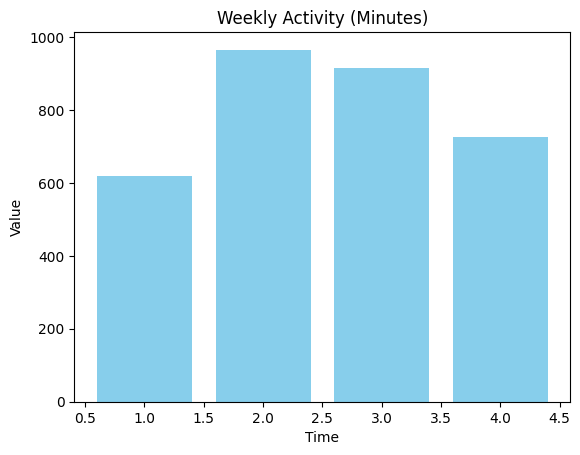

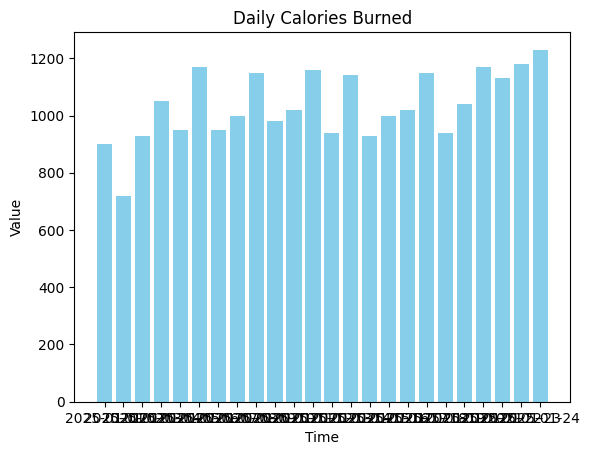

Personal Fitness Tracker
1. Log a new activity
2. View activity history
3. Set and update fitness goals
4. View progress reports
5. Exit
Enter your choice: 5
Exiting tracker. Stay fit!


In [ ]:
main()